# Modelos de Clasificación y Regresión con Hiperparámetros
## Data Mining - Doctorado UDP 2025
**Bastián González-Bustamante** \
Octubre 2025

In [1]:
## Importar librerías necesarias
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score, classification_report
)
import warnings

In [2]:
## Ignorar warnings para una salida más limpia
warnings.filterwarnings('ignore')

## Cargar el dataset (California Housing)

In [3]:
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name='MedHouseVal')  ## Valor medio de las viviendas

## División de los datos en entrenamiento y prueba

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=86
)

In [5]:
## Escalado de características (para mejorar rendimiento de SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
## Preparación para clasificación
## Discretizar la variable objetivo en 3 categorías: Bajo, Medio, Alto
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
y_train_class = discretizer.fit_transform(y_train.values.reshape(-1, 1)).astype(int).flatten()
y_test_class = discretizer.transform(y_test.values.reshape(-1, 1)).astype(int).flatten()

In [7]:
## Función para imprimir métricas de clasificación
def print_classification_metrics(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("\n")

In [8]:
## Función para imprimir métricas de regresión
def print_regression_metrics(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print("\n")

## SVM Kernels

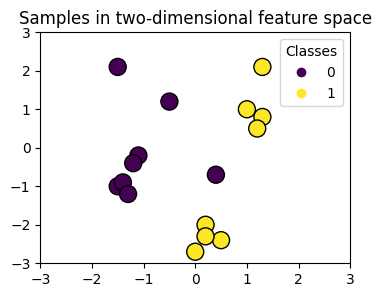

In [9]:
import matplotlib.pyplot as plt
import numpy as np

## scikit-learn example
X = np.array(
    [
        [0.4, -0.7],
        [-1.5, -1.0],
        [-1.4, -0.9],
        [-1.3, -1.2],
        [-1.1, -0.2],
        [-1.2, -0.4],
        [-0.5, 1.2],
        [-1.5, 2.1],
        [1.0, 1.0],
        [1.3, 0.8],
        [1.2, 0.5],
        [0.2, -2.0],
        [0.5, -2.4],
        [0.2, -2.3],
        [0.0, -2.7],
        [1.3, 2.1],
    ]
)

y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

# Plotting settings
fig, ax = plt.subplots(figsize=(4, 3))
x_min, x_max, y_min, y_max = -3, 3, -3, 3
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

# Plot samples by color and add legend
scatter = ax.scatter(X[:, 0], X[:, 1], s=150, c=y, label=y, edgecolors="k")
ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.set_title("Samples in two-dimensional feature space")
plt.show()

In [10]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay


def plot_training_data_with_decision_boundary(
    kernel, ax=None, long_title=True, support_vectors=True
):
    # Train the SVC
    clf = svm.SVC(kernel=kernel, gamma=2).fit(X, y)

    # Settings for plotting
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 3))
    x_min, x_max, y_min, y_max = -3, 3, -3, 3
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    if support_vectors:
        # Plot bigger circles around samples that serve as support vectors
        ax.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=150,
            facecolors="none",
            edgecolors="k",
        )

    # Plot samples by color and add legend
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    if long_title:
        ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")
    else:
        ax.set_title(kernel)

    if ax is None:
        plt.show()

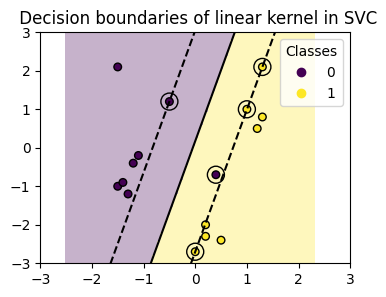

In [11]:
plot_training_data_with_decision_boundary("linear")

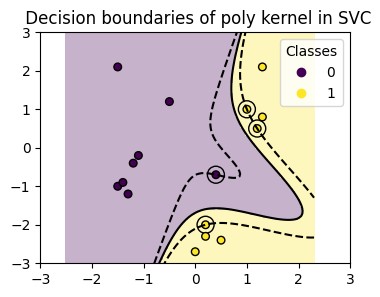

In [12]:
plot_training_data_with_decision_boundary("poly")

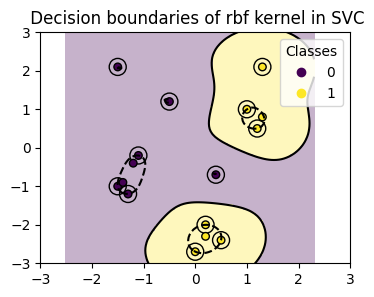

In [13]:
plot_training_data_with_decision_boundary("rbf")

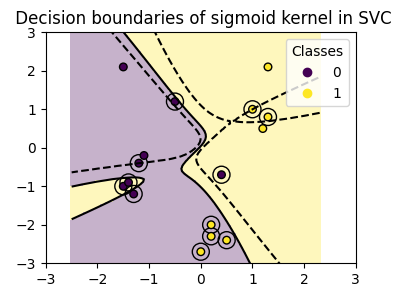

In [14]:
plot_training_data_with_decision_boundary("sigmoid")

## Support Vector Machine (SVM, Clasificación)

In [15]:
## SVM para Clasificación
svc = SVC(kernel='rbf', probability=True)
svc.fit(X_train_scaled, y_train_class)
y_pred_svc = svc.predict(X_test_scaled)
print_classification_metrics(y_test_class, y_pred_svc, "SVM Clasificación")

--- SVM Clasificación ---
Accuracy: 0.7602
Precision: 0.7660
Recall: 0.7602
F1-Score: 0.7624
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1414
           1       0.63      0.69      0.66      1327
           2       0.83      0.80      0.82      1387

    accuracy                           0.76      4128
   macro avg       0.76      0.76      0.76      4128
weighted avg       0.77      0.76      0.76      4128





In [16]:
## Hyperparameter tuning
svc_ft = SVC(kernel='rbf', C=0.2, random_state=86)
## C: Regularization parameter. A smaller C increases regularization strength, which can help avoid overfitting but might reduce accuracy.
svc_ft.fit(X_train_scaled, y_train_class)
y_pred_svc_ft = svc_ft.predict(X_test_scaled)
print_classification_metrics(y_test_class, y_pred_svc_ft, "SVM Clasificación")

--- SVM Clasificación ---
Accuracy: 0.7415
Precision: 0.7477
Recall: 0.7415
F1-Score: 0.7439
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1414
           1       0.61      0.66      0.63      1327
           2       0.82      0.78      0.80      1387

    accuracy                           0.74      4128
   macro avg       0.75      0.74      0.74      4128
weighted avg       0.75      0.74      0.74      4128





## Random Forest (Clasificación)

In [17]:
## Random Forest para clasificación con 100 árboles
rf_class_100 = RandomForestClassifier(n_estimators=100, random_state=86)
rf_class_100.fit(X_train, y_train_class)
y_pred_rf_class_100 = rf_class_100.predict(X_test)
print_classification_metrics(y_test_class, y_pred_rf_class_100, "Random Forest Clasificación (100 árboles)")

--- Random Forest Clasificación (100 árboles) ---
Accuracy: 0.8171
Precision: 0.8170
Recall: 0.8171
F1-Score: 0.8169
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1414
           1       0.73      0.73      0.73      1327
           2       0.87      0.84      0.85      1387

    accuracy                           0.82      4128
   macro avg       0.82      0.82      0.82      4128
weighted avg       0.82      0.82      0.82      4128





In [18]:
## Hyperparameter tuning
rf_model_ft = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=86)
## For Random Forest, you can tune the number of trees, maximum depth, and minimum samples per leaf to optimize its performance:
## n_estimators: Number of trees in the forest. More trees can improve accuracy but increase computation time (e.g., 100, 200).
## max_depth: Maximum depth of each tree. Limiting depth can prevent overfitting (e.g., max_depth=10).
## min_samples_split: Minimum samples required to split an internal node. A higher value can reduce overfitting.
## min_samples_leaf: Minimum samples required at a leaf node.

In [19]:
rf_model_ft.fit(X_train, y_train_class)
y_pred_rf_ft = rf_model_ft.predict(X_test)
print_classification_metrics(y_test_class, y_pred_rf_ft, "Random Forest Clasificación (500 árboles + ajustes)")

--- Random Forest Clasificación (500 árboles + ajustes) ---
Accuracy: 0.7922
Precision: 0.7928
Recall: 0.7922
F1-Score: 0.7924
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1414
           1       0.70      0.71      0.70      1327
           2       0.85      0.82      0.83      1387

    accuracy                           0.79      4128
   macro avg       0.79      0.79      0.79      4128
weighted avg       0.79      0.79      0.79      4128





## XGBoost (Clasificación)

In [20]:
## XGBoost para Clasificación
xg_class = xgb.XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='mlogloss', random_state=86)
xg_class.fit(X_train_scaled, y_train_class)
y_pred_xg_class = xg_class.predict(X_test_scaled)
print_classification_metrics(y_test_class, y_pred_xg_class, "XGBoost Clasificación")

--- XGBoost Clasificación ---
Accuracy: 0.8358
Precision: 0.8370
Recall: 0.8358
F1-Score: 0.8362
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1414
           1       0.75      0.77      0.76      1327
           2       0.89      0.86      0.87      1387

    accuracy                           0.84      4128
   macro avg       0.84      0.83      0.83      4128
weighted avg       0.84      0.84      0.84      4128





In [21]:
## Hyperparameter tuning
xgb_model_ft = xgb.XGBClassifier(eval_metric='mlogloss', learning_rate=0.1, n_estimators=500, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=86)
## mlogloss is multiclass log-loss, other options could be merror (multiclass error rate), auc
## XGBoost has several parameters that can greatly influence its performance. The learning_rate and n_estimators are especially important.
## learning_rate: Controls the step size of each update. Lower values improve generalization (e.g., 0.1, 0.01).
## n_estimators: Number of boosting rounds. More rounds usually improve performance but increase training time.
## max_depth: Maximum depth of each tree, controlling complexity.
## subsample: Fraction of samples used for each tree. Reducing this can help prevent overfitting.
## colsample_bytree: Fraction of features used for each tree.

In [22]:
xgb_model_ft.fit(X_train_scaled, y_train_class)
y_pred_xgb_ft = xgb_model_ft.predict(X_test_scaled)
print_classification_metrics(y_test_class, y_pred_xgb_ft, "XGBoost Clasificación")

--- XGBoost Clasificación ---
Accuracy: 0.8338
Precision: 0.8346
Recall: 0.8338
F1-Score: 0.8342
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1414
           1       0.75      0.76      0.75      1327
           2       0.88      0.85      0.87      1387

    accuracy                           0.83      4128
   macro avg       0.83      0.83      0.83      4128
weighted avg       0.83      0.83      0.83      4128



